In [1]:
from src.RBF import RBFNet
from src.ES import ES
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import csv
import xlrd

In [2]:
points = np.loadtxt('regdata2000.csv', delimiter=',')
np.random.shuffle(points)
m = points.shape[0] # rows
n = points.shape[1] - 1 # features
X = points[:, :n]
y = points[:, n:]
X, y = preprocessing.scale(X), preprocessing.scale(y)
m

2000

In [3]:
X_train = X[:1200, :]
y_train = y[:1200, :]
es = ES(X=X_train, y=y_train, MU=50, LAMBDA=100, ngen=15, circles=5, problem='regression')
my_rbf = es.train()

start training
gen	nevals	avg    	std    	min    	max
0  	50    	53.4185	66.9245	2.54559	342
1  	100   	27.0459	21.3779	1.4093 	83.1163
2  	100   	18.3858	15.5409	1.4093 	83.1163
3  	100   	13.4768	9.28721	0.668752	38.87  
4  	100   	13.166 	13.0281	0.898116	86.1324
5  	100   	9.84097	6.83626	0.898116	40.5021
6  	100   	9.35007	9.80681	0.898116	61.5092
7  	100   	7.85757	10.0911	0.898116	61.5092
8  	100   	7.1573 	14.3828	0.412952	100.132
9  	100   	4.59626	6.45457	0.401968	32.7345
10 	100   	2.84761	6.05446	0.401968	42.463 
11 	100   	1.1848 	1.32976	0.337124	8.37253
12 	100   	0.810127	1.09658	0.401968	8.37253
13 	100   	0.658501	0.206659	0.390061	1.45255
14 	100   	0.741494	0.688014	0.276916	5.37777
15 	100   	0.588224	0.173244	0.276916	1.11593
best individual's error: [[0.27691585]]


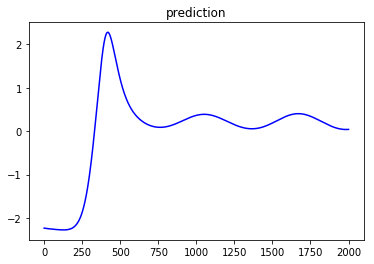

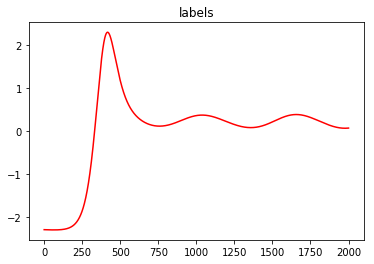

In [6]:
points = np.loadtxt('regdata2000.csv', delimiter=',')
points = preprocessing.scale(points)
xs_plot = [_ for _ in range(1, 2001)]
ys_plot = []
datas = points[:, :n]
labels = points[:, n:].ravel()
for data in datas:
    ys_plot.append(my_rbf.apply_network(data).item())
plt.title('prediction')
plt.plot(xs_plot, ys_plot, 'b')
plt.show()
plt.title('labels')
plt.plot(xs_plot, labels, 'r')
plt.show()